In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

In [2]:
# preprocessing
from util import preprocessData

(ratings, reviews) = preprocessData('sportsTrain.csv')

In [3]:
# loading the word vectors
embeddings_dict = {}
with open("glove.6B.300d.txt", 'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [4]:
from util import createWordVectorFeatures
(ratingsTest, reviewsTest) = preprocessData('sportsTest.csv')
print(len(ratingsTest))
(Xtest, ytest) = createWordVectorFeatures(reviewsTest, ratingsTest, \
                                        embeddings_dict, 10000)

284081


In [5]:
from util import createWordVectorFeatures
(ratingsVal, reviewsVal) = preprocessData('sportsDev.csv')
print(len(ratingsVal))
(Xval, yval) = createWordVectorFeatures(reviewsVal, ratingsVal, \
                                        embeddings_dict, 10000)

284248


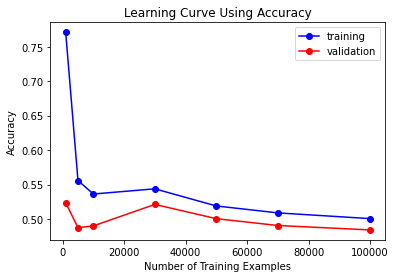

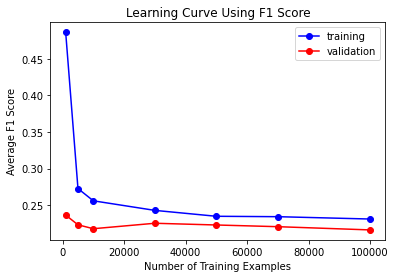

In [6]:
from sklearn.linear_model import LinearRegression
from util import linRegPredict, evalModel

# Plotting the learning curve
trainSizes = [1000, 5000, 10000, 30000, 50000, 70000, 100000]
trainAccs = []
valAccs = []
trainF1s = []
valF1s = []

for trainSize in trainSizes:
    # create feature vector and labels
    (X, y) = createWordVectorFeatures(reviews, ratings, embeddings_dict, trainSize)
    # train a linear model
    linReg = LinearRegression().fit(X, y)
    (valAcc, valF1, _) = evalModel(linRegPredict(linReg, Xval), yval)
    (trainAcc, trainF1, _) = evalModel(linRegPredict(linReg, X), y)
    trainAccs.append(trainAcc)
    valAccs.append(valAcc)
    trainF1s.append(trainF1)
    valF1s.append(valF1)

# plot
plt.title('Learning Curve Using Accuracy')
plt.plot(trainSizes, trainAccs, 'bo-', label = 'training')
plt.plot(trainSizes, valAccs, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.title('Learning Curve Using F1 Score')
plt.plot(trainSizes, trainF1s, 'bo-', label = 'training')
plt.plot(trainSizes, valF1s, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Average F1 Score')
plt.legend()
plt.show()

In [8]:
(testAcc, testF1, confM) = evalModel(linRegPredict(linReg, Xtest), ytest)
print(testAcc)
print(testF1)
print(confM.astype(np.int))

0.4962
0.21497354886354714
[[   3    3   34  361   13]
 [   2    4   23  273   12]
 [   1    2   23  594   54]
 [   0    5   25 1061  437]
 [   3    2   35 3159 3871]]


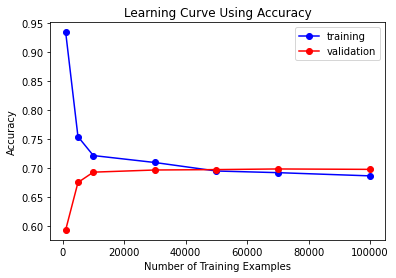

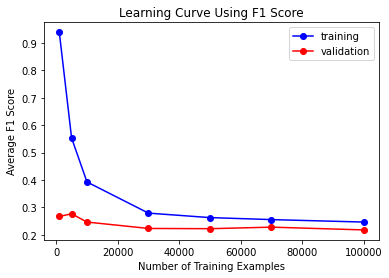

In [9]:
from sklearn.svm import LinearSVC
from util import evalModel

# Plotting the learning curve
trainSizes = [1000, 5000, 10000, 30000, 50000, 70000, 100000]
trainAccs = []
valAccs = []
trainF1s = []
valF1s = []

for trainSize in trainSizes:
    # create feature vector and labels
    (X, y) = createWordVectorFeatures(reviews, ratings, embeddings_dict, trainSize)
    # train a linear model
    svmModel = LinearSVC(dual = False, max_iter=5000).fit(X, y)
    (valAcc, valF1, _) = evalModel(svmModel.predict(Xval), yval)
    (trainAcc, trainF1, _) = evalModel(svmModel.predict(X), y)
    trainAccs.append(trainAcc)
    valAccs.append(valAcc)
    trainF1s.append(trainF1)
    valF1s.append(valF1)

# plot
plt.title('Learning Curve Using Accuracy')
plt.plot(trainSizes, trainAccs, 'bo-', label = 'training')
plt.plot(trainSizes, valAccs, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.title('Learning Curve Using F1 Score')
plt.plot(trainSizes, trainF1s, 'bo-', label = 'training')
plt.plot(trainSizes, valF1s, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Average F1 Score')
plt.legend()
plt.show()

In [10]:
(testAcc, testF1, confM) = evalModel(svmModel.predict(Xtest), ytest)
print(testAcc)
print(testF1)
print(confM.astype(np.int))

0.7118
0.2176600177346172
[[  33    0    3    6  372]
 [  16    1    5   16  276]
 [   6    0    6   57  605]
 [   8    0    8   81 1431]
 [   5    0    4   64 6997]]
